# Grand canonical Monte Carlo simulations

In [1]:
const N_DIMS = 1
include("higher_dim_gcmc.jl")

NVT (generic function with 1 method)

Define model parameters here.

In [2]:
pressures = collect(linspace(0.001, 2.0, 30)) # bar
temperature = 273.0 # K
RT = 8.314 * temperature / 1000.0 # kJ/mol for Qst
n_sites = 100

# For Kr in MIL-91(Al)
site_volume = 12.32 # A^3, motivated by MIL-93(Al)
energy_params = construct_energy_param(ϵ_0=13.0, ϵ=5.5, ϵ_l=3.0)

EnergyParams(3.0,5.5,13.0)

Run isotherm

In [4]:
# df_gcmc = run_gcmc_isotherm(pressures, energy_params, n_sites, site_volume, temperature, samples_per_site=50000);
df_gcmc = run_gcmc_isotherm(pressures, energy_params, n_sites, site_volume, temperature, samples_per_site=1000); # make 50000 for paper

,P,n,l,qst,qst_gh,qst_h,n2,n3,n1n2,desorption_branch
1,0.001,0.001044,0.212646,20.23196039086702,23.20535806129358,-0.7036756704265636,1.152e-5,1.368e-7,2.0e-6,false
2,0.06993103448275861,0.08373599999999999,0.298768,21.777372079968938,24.299905145130168,-0.25281106516122875,0.00784172,0.0008058923999999999,0.015256,false
3,0.13886206896551725,0.194574,0.40137999999999996,22.134956944899688,24.838765665703868,-0.43408672080413924,0.04028758,0.008855997,0.06812599999999999,false
4,0.20779310344827587,0.292832,0.485122,22.755069997528107,25.445775887516685,-0.420983889988654,0.08931132,0.0282848864,0.13152799999999998,false
5,0.2767241379310345,0.388596,0.566588,23.239406197169487,25.449954687315785,0.05917350985378711,0.15412932000000001,0.062277887999999997,0.20530400000000001,false
6,0.3456551724137931,0.485332,0.637124,23.317026686265788,25.70766685560284,-0.12091816933736288,0.23965908,0.1203225592,0.29583,false
7,0.41458620689655173,0.541534,0.6787439999999999,23.77770247194481,25.875647608107524,0.17177686383753166,0.29621998,0.1636186678,0.359008,false
8,0.48351724137931035,0.62289,0.7416280000000001,24.23657468048892,26.003457722123134,0.5028389583655573,0.3911529,0.2475895374,0.44192,false
9,0.552448275862069,0.670262,0.78039,24.45288494989902,26.540878703425488,0.18172824647312646,0.45240354,0.3074102498,0.49886600000000003,false
10,0.6213793103448276,0.7095699999999999,0.7998139999999999,24.252112367528735,26.329864968114652,0.19196939941335112,0.50597786,0.36250825420000005,0.548176,false


Plot results

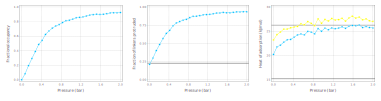

In [5]:
myplot = plot_gcmc_results(df_gcmc, energy_params, temperature)
draw(SVGJS(15inch, 4inch), myplot)

# Exact solution using transfer matrix theory

In [8]:
include("exact_soln.jl")

LangmuirOptU

## Baseline results and comparison with GCMC

Compute adsorption isotherm and other quantities as a function of pressure.

In [9]:
pressures = vcat(collect(linspace(0.00001, 2.0, 200)), collect(linspace(1.05, 50.0, 20)))
df_exact = get_exact_isotherm(pressures, energy_params, n_sites, site_volume, temperature);

In [10]:
qst_by_differentiation(pressures[end], energy_params, n_sites, site_volume, temperature)

(27.010853529603096,26.0799247458605,-1.3388360275012072)

In [11]:
df_exact[:qst][end]

27.010605816752804

In [12]:
df_exact[:qst_gh][end]

28.34942284530272

In [13]:
for i = 1:length(df_exact[:qst])
    df_exact[:qst_gh][i] = qst_by_differentiation(pressures[i], energy_params, n_sites, site_volume, temperature)[2]
end

Compute inflection point

In [14]:
inflection_pressure, inflection_n = compute_inflection_pt(energy_params, n_sites, site_volume, temperature)

(0.17732723317159116,0.24200170760452824)

Consider two extreme cases, $\epsilon_\ell \rightarrow \pm \infty$.

In [15]:
energy_params_low = deepcopy(energy_params)
energy_params_low.ϵ_l = 10000000.0

energy_params_high = deepcopy(energy_params)
energy_params_high.ϵ_l = -100.0

df_low = get_exact_isotherm(pressures, energy_params_low, n_sites, site_volume, temperature);
df_high = get_exact_isotherm(pressures, energy_params_high, n_sites, site_volume, temperature);

Plot results in three panels.
1. Adsorption isotherm
2. Linker configurations
3. Isosteric heat of adsorption

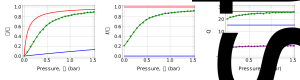

LoadError: LoadError: Cairo and Fontconfig are necessary for the PDF backend. Run:
  Pkg.add("Cairo")
  Pkg.add("Fontconfig")
You also have to delete /home/cory/.julia/lib/v0.5/Compose.ji
and restart your REPL session afterwards.

while loading In[16], in expression starting on line 105

In [16]:
# Adsorption isotherm
using Compose
myplot_n = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:n], Geom.line, Theme(default_color=colorant"green", line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:n], Geom.point, Theme(default_color=colorant"green")),
    # two extremes cases
    layer(x=df_high[:P], y=df_high[:n], Geom.line, Theme(default_color=colorant"red", line_width=.6mm)), 
    layer(x=df_low[:P], y=df_low[:n], Geom.line, Theme(default_color=colorant"blue", line_width=.6mm)), 
    # inflection pressure
    Guide.annotation(
           compose(context(), circle([inflection_pressure], [inflection_n], [1mm]), fill(nothing),
           stroke(colorant"orange"))),
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("𝑛/𝑀"),
#    Guide.title("Adsorption isotherm"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black",
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Coord.Cartesian(xmax=1.5),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0))
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

# Linker configurations
myplot_l = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:l], Geom.line, Theme(default_color=colorant"green", line_width=.6mm)),
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:l], Geom.point, Theme(default_color=colorant"green")),
#     # Inflection pressure
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    # Two extremes
    layer(x=[0,1.75], y=[0.0, 0.0], Geom.line, 
                Theme(line_width=0.6mm, default_color=colorant"blue")),
    layer(x=[0,1.75], y=[1.0, 1.0], 
                Geom.line, Theme(line_width=0.6mm, default_color=colorant"red")),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("ℓ/𝑀"),
#    Guide.title("Linker configurations"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", 
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Coord.Cartesian(xmax=1.5),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0))
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

# Isosteric heat of ads
myplot_qst = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:qst], Geom.line, Theme(default_color=colorant"green", 
        line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:qst], Geom.point, Theme(default_color=colorant"green")),
    # only due to host
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:qst_h]-RT, Geom.line, Theme(default_color=colorant"purple", line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:qst_h]-RT, Geom.point, Theme(default_color=colorant"purple")),
#     Inflection pressurx
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    # Two extremes
    layer(x=[0,1.75], y=[energy_params.ϵ_0 + RT for i=1:2], Geom.line, 
                Theme(line_width=0.6mm, default_color=colorant"blue")),
    layer(x=[0,1.75], y=[energy_params.ϵ_0 + 2 * energy_params.ϵ + RT for i=1:2], 
                Geom.line, Theme(line_width=0.6mm, default_color=colorant"red")),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
    Coord.Cartesian(xmax=1.5),
   # Guide.title("Heat of adsorption"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", 
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

draw(SVG(30cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))
draw(PDF("exact_soln.pdf", 30cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))

### $Cov(n_1, n_2)$

In [17]:
df_exact[:cov_n1n2] = df_exact[:n1n2] - df_exact[:n] .^ 2
df_gcmc[:cov_n1n2] = df_gcmc[:n1n2] - df_gcmc[:n] .^ 2;

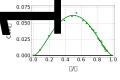

LoadError: LoadError: Cairo and Fontconfig are necessary for the PDF backend. Run:
  Pkg.add("Cairo")
  Pkg.add("Fontconfig")
You also have to delete /home/cory/.julia/lib/v0.5/Compose.ji
and restart your REPL session afterwards.

while loading In[18], in expression starting on line 29

In [18]:
myplot_ninj = plot(
    # Exact sol'n
    layer(x=df_exact[:n], y=df_exact[:cov_n1n2], Geom.line, Theme(default_color=colorant"green",
        line_width=0.7mm)), 
#     GCMC
    layer(x=df_gcmc[:n], y=df_gcmc[:cov_n1n2], Geom.point, Theme(default_color=colorant"green")),
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.025:0.075)),
    layer(x=[0.0, 1.0], y=[0.0, 0.0], Geom.line, Theme(default_color=colorant"black", line_width=0.7mm)), 
#     xintercept=[inflection_n],
#     Geom.vline(),
#     Geom.hline(color=colorant"black"),
#     yintercept=[0.0],
    Guide.ylabel("Cov(𝑛<sub>1</sub>, 𝑛<sub>2</sub>)"),
   # Guide.title("Covariance of adjacent cage occupancy"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", grid_color=colorant"Gray",
        line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black")
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

draw(SVG(12cm, 8cm), myplot_ninj)
draw(PDF("twosite.pdf", 12cm, 8cm), myplot_ninj)

## Intrinisic heat management
To better understand the isosteric heat of adsorption,


In [19]:
ϵ_ls = [-100., 0.0, 2.5, 5.0, 200.0]
dfs = []
for ϵ_l in ϵ_ls
    pressures_hm = collect(logspace(-8, 2))
    if ϵ_l > 10.0
        pressures_hm = collect(logspace(-8, 3))
    end
    energy_params_ = deepcopy(energy_params)
    energy_params_.ϵ_l = ϵ_l
    push!(dfs, get_exact_isotherm(pressures_hm, energy_params_, n_sites, site_volume, temperature))
end

using Colors
colors = distinguishable_colors(length(ϵ_ls))

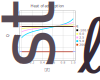

In [20]:
myplot_qst = plot(
    # Exact soln
[layer(x=dfs[i][:n], y=dfs[i][:qst_gh]-RT, 
    Geom.line,
        Theme(default_color=colors[i], line_width=.7mm)) 
            for i = 1:length(ϵ_ls)]..., 
    # Two extremes
    layer(yintercept=[energy_params.ϵ_0], 
    Geom.hline(color=colorant"blue")),
    layer(yintercept=[energy_params.ϵ_0 + 2 * energy_params.ϵ], 
    Geom.hline(color=colorant"red")),
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
    Guide.title("Heat of adsorption"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray"),
    Guide.manual_color_key("ϵ<sub>ℓ</sub> (kJ/mol)", 
        [@sprintf("%.1f", ϵ_ls[i]) for i = 1:length(ϵ_ls)],
        colors
    )
)

draw(SVG(10cm, 8cm), myplot_qst)
# draw(PNG("Qst.png", 10cm, 8cm, dpi=300), myplot_qst)

## Optimize working capacity

High and low pressures in the pressure-swing adsorption process.

In [21]:
P_H = 1.5 # bar
P_L = 0.1 # bar

0.1

As an example, plot an optimal Langmuir isotherm against an optimal isotherm in our model.

Opt D = 0.7711966662187909
eps_0 = 12.840327 kJ/mol (+ve is favorable)
eps_l = 3.000000 kJ/mol (+ve is unfavorable)
eps = 5.500000 kJ/mol (+ve is favorable)
Langmuir: 

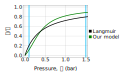

Dict{AbstractString,Float64}(Pair{AbstractString,Float64}("Dopt",0.589574),Pair{AbstractString,Float64}("Kopt",2.58199),Pair{AbstractString,Float64}("Uopt",-20.3697))


LoadError: LoadError: Cairo and Fontconfig are necessary for the PDF backend. Run:
  Pkg.add("Cairo")
  Pkg.add("Fontconfig")
You also have to delete /home/cory/.julia/lib/v0.5/Compose.ji
and restart your REPL session afterwards.

while loading In[22], in expression starting on line 32

In [22]:
opt_energy_params, optD = optimize_working_capacity("ϵ_0", P_H, P_L, energy_params, n_sites, site_volume, temperature)
println("Opt D = ", optD)
print_energy_params(opt_energy_params)
opt_Langmuir = LangmuirOptU(P_H, P_L, site_volume, temperature)
println("Langmuir: ", opt_Langmuir)

p_plot = collect(linspace(0, 2.0))
df_opt = get_exact_isotherm(p_plot, opt_energy_params, n_sites, site_volume, temperature)

D_compare_plot = plot(
    layer(x=p_plot, y=opt_Langmuir["Kopt"] * p_plot ./ (1 + opt_Langmuir["Kopt"] * p_plot), 
    Geom.line, Theme(default_color=colorant"black", line_width=0.7mm)),
    layer(x=df_opt[:P], y=df_opt[:n] , Geom.line, Theme(default_color=colorant"green", line_width=0.7mm)),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Coord.Cartesian(xmax=1.5),
    xintercept=[P_H, P_L],
    Geom.vline(),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray",
        line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, key_label_font_size=14pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Guide.manual_color_key("",
        ["Langmuir", "Our model"], 
        [colorant"black", colorant"green"]
    ),
    #Guide.title("Optimal adsorption curves")
)
draw(SVG(12cm, 8cm), D_compare_plot)
draw(PDF("OptimizeWC_example.pdf", 12cm, 8cm), D_compare_plot)

In [23]:
opt_Langmuir["Kopt"] * P_H / (1 + opt_Langmuir["Kopt"] * P_H) - 
opt_Langmuir["Kopt"] * P_L / (1 + opt_Langmuir["Kopt"] * P_L)

0.5895738076846548

## Find optimum working capacity achievable by fixing $\epsilon$ and $\epsilon_\ell$ and changing $\epsilon_0$.

In [ ]:
# Span of parameters
ϵ_span = collect(linspace(0.0, 15.0, 50))
ϵ_l_span = collect(linspace(0.0, 15.0, 50))

# Store optimum deliverable capacity here.
D_opt = zeros(Float64, length(ϵ_span), length(ϵ_l_span))
ϵ_0_opt = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Loop over parameter space, optimize deliverable capacity
for (i, ϵ) in enumerate(ϵ_span)
    for (j, ϵ_l) in enumerate(ϵ_l_span)
        baseline_energy_params = deepcopy(energy_params)
        baseline_energy_params.ϵ = ϵ
        baseline_energy_params.ϵ_l = ϵ_l
        
        opt_energy_params, D_opt[i, j] = optimize_working_capacity("ϵ_0", P_H, P_L, 
                baseline_energy_params, n_sites, site_volume, temperature)
        
        ϵ_0_opt[i, j] = opt_energy_params.ϵ_0
        
        # assert we arrived at an optimum
        baseline_energy_params.ϵ_0 = ϵ_0_opt[i, j] - 0.01
        @assert(compute_working_capacity(P_H, P_L, baseline_energy_params, n_sites, site_volume, temperature) <
            D_opt[i, j])
        baseline_energy_params.ϵ_0 = ϵ_0_opt[i, j] + 2 * 0.01
        @assert(compute_working_capacity(P_H, P_L, baseline_energy_params, n_sites, site_volume, temperature) <
            D_opt[i, j])
    end
end

In [ ]:
Dopt_levels = 0.45:0.05:1.0
ϵ_0_opt_levels = -5.0:1.0:16.0

In [ ]:
Dopt_plot = plot(
    x=ϵ_span, y=ϵ_l_span, z=D_opt, Geom.contour(levels=8),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑤<sub>opt</sub>"),
    Guide.title(""),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
         line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, 
        key_label_font_size=14pt, key_title_font_size=16pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
)

ϵ_0_opt_plot = plot(
x=ϵ_span, y=ϵ_l_span, z=ϵ_0_opt, Geom.contour(levels=8),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("ϵ<sub>0, opt</sub>"),
    Guide.title(""),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
     line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, 
        key_label_font_size=14pt, key_title_font_size=16pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black")
)

using Compose
#shared_title = compose(context(0, 0, 1, 0.1), fontsize(16pt),
#text(0.5, 1.0, "Optimizing working capacity by tuning ϵ<sub>0</sub>", hcenter, vbottom))
#myplot = vstack(shared_title, compose(context(0, 0, 1, 0.9), hstack(Dopt_plot, ϵ_0_opt_plot)))
myplot = hstack(Dopt_plot, ϵ_0_opt_plot)
#draw(PDF("inflection_conditions.pdf", 24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))
draw(SVG(24cm, 9cm), myplot)
draw(PDF("OptimizeWC.pdf", 24cm, 9cm), myplot)

In [ ]:
function orange_colormap(value::Float64)
    n_colors::Int = 500
    cc = colormap("Oranges", n_colors)
    id = floor(Int, value * (n_colors- 1))+1
    return cc[id]
end

## Explore parameter space

In [ ]:
using Colors

In [ ]:
function explore_param_space(which_param::AbstractString, 
                            param_space::Array{Float64},
                            baseline_energy_params::EnergyParams,
                            n_sites::Int, 
                            site_volume::Float64, 
                            temperature::Float64)
    """
    Explore parameter space of a given parameter in model. Plot adsorption isotherms, <l>, Qst.
    
    Parameters:
        which_param: which parameter to explore? "ϵ_0", "ϵ", or "ϵ_l"
        param_space: array of parameters to explore
        pressures: array of pressures for corresponding adsorption isotherm calculation
        baseline_energy_params: gives baseline EnergyParams of other variables that are held constant in this exploration
    """
    if ! (which_param in ["ϵ<sub>0</sub>", "ϵ", "ϵ<sub>ℓ</sub>"])
        @printf("which_param must be:")
        println(["ϵ<sub>0</sub>", "ϵ", "ϵ<sub>ℓ</sub>"])
        error("Pass a valid which_parm")
    end
    # different pressure array for isotherm than Qst and <l>
    # this is for the adsorption isotherm
    pressures_n = collect(linspace(1e-4, 1.5, 300))
    n = zeros(Float64, length(pressures_n), length(param_space))
    # this is for <l>, Qst as a function of n.
    pressures_l_qst = collect(logspace(-5., 4., 300))
    n_l_qst = zeros(Float64, length(pressures_l_qst), length(param_space))
    l = zeros(Float64, length(pressures_l_qst), length(param_space))
    qst = zeros(Float64, length(pressures_l_qst), length(param_space))
    for i = 1:length(param_space)
        # copy baseline energy parameters
        energy_params_here = deepcopy(baseline_energy_params)
        
        # modify the desired parameter
        if which_param == "ϵ<sub>0</sub>"
            energy_params_here.ϵ_0 = param_space[i]
        elseif which_param == "ϵ"
            energy_params_here.ϵ = param_space[i]
        elseif which_param == "ϵ<sub>ℓ</sub>"
            energy_params_here.ϵ_l = param_space[i]
        end
    
        # get the soln with these parameters
        df = get_exact_isotherm(pressures_n, energy_params_here, n_sites, site_volume, temperature)
        n[:, i] = convert(Array, df[:n])
        
        df = get_exact_isotherm(pressures_l_qst, energy_params_here, n_sites, site_volume, temperature)
        n_l_qst[:, i] = convert(Array, df[:n])
        l[:, i] = convert(Array, df[:l])
        qst[:, i] = convert(Array, df[:qst])
    end

    # get colors to represent different parameter values
    colors = colormap("Greens", length(param_space))
    
    # plot adsorption isotherm
    myplot_1 = plot(
        [layer(x=pressures_n, y=n[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
        Guide.xlabel("Pressure, 𝑃 (bar)"),
        Guide.ylabel("𝑛/𝑀"),
        Guide.title("Adsorption isotherm"),
        Guide.xticks(ticks=collect(0.0:0.5:1.5)),
        Guide.yticks(ticks=collect(linspace(0, 1, 6))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0),
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    # plot linker configs
    colors = colormap("Blues", length(param_space))
    
    myplot_2 = plot(
        [layer(x=n_l_qst[:, i], y=l[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
        Guide.xlabel("𝑛/𝑀"),
        Guide.ylabel("ℓ/𝑀"),
        Guide.title("Linker configurations"),
        Guide.xticks(ticks=collect(linspace(0, 1, 6))),
        Guide.yticks(ticks=collect(linspace(0, 1, 6))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    # qst
    colors = colormap("Reds", length(param_space))
    
    myplot_3 = plot(
    [layer(x=n_l_qst[:, i], y=qst[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
    Coord.Cartesian(ymin=0., ymax=35.),
        Guide.xlabel("𝑛/𝑀"),
        Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
        Guide.title("Heat of adsorption"),
        Guide.xticks(ticks=collect(linspace(0, 1, 6))),
        #Guide.yticks(ticks=collect(linspace(0, 1, 11))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    save_name = Dict()
    save_name["ϵ"] = "epsilon"
    save_name["ϵ<sub>0</sub>"] = "epsilon_0"
    save_name["ϵ<sub>ℓ</sub>"] = "epsilon_l"
    draw(PDF(@sprintf("%s.pdf", save_name[which_param]), 34cm, 8cm), hstack(myplot_1, myplot_2, myplot_3))
    draw(SVG(34cm, 8cm), hstack(myplot_1, myplot_2, myplot_3))
end

In [ ]:
baseline_energy_params = deepcopy(energy_params)

n_params = 5 # explore this many parameters

explore_param_space("ϵ",
    collect(linspace(0.0, 10.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

explore_param_space("ϵ<sub>ℓ</sub>",
    collect(linspace(0.0, 15.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

explore_param_space("ϵ<sub>0</sub>",
    collect(linspace(0.0, 20.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

## Parameter regime such that inflection is present in adsorption isotherm
Explore $\epsilon$-$\epsilon_\ell$ parameter space and compute inflection pressure and loading.

The boundary is approximated by considering the concavity at zero pressure (approximately zero). If second derivative of $n$ wrt $P$ is positive at a low pressure, then the adsorption isotherm starts concave up and will exhibit an inflection since it must saturate at higher pressure.

If getting NaN a lot, change guess in `fzero` in `compute_inflection_pt`.

In [ ]:
include("exact_soln.jl")
# Span of parameters
ϵ_span = collect(linspace(0.0, 15.0, 200))
ϵ_l_span = collect(linspace(0.0, 15.0, 200))

# Store pressure and loading at the inflection here.
P_inflection = zeros(Float64, length(ϵ_span), length(ϵ_l_span))
N_inflection = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Store d^2 n / dp^2 at a very low pressure here.
d2N_dP2_lowP = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Loop over parameter space, compute inflection
for (i, ϵ) in enumerate(ϵ_span)
    for (j, ϵ_l) in enumerate(ϵ_l_span)
        energy_params_inflect = deepcopy(energy_params)
        energy_params_inflect.ϵ = ϵ
        energy_params_inflect.ϵ_l = ϵ_l
        P_inflection[i, j], N_inflection[i, j] = compute_inflection_pt(energy_params_inflect, 
                                    n_sites, site_volume, temperature)
        
        # get solution at a low pressure
        soln_low_P = exact_soln(1.0e-8, energy_params_inflect, n_sites, site_volume, temperature)
        d2N_dP2_lowP[i, j] = soln_low_P["d2n_dp2"]
    end
end

In [ ]:
# P_inflection[isnan(P_inflection)] = -1.0
# N_inflection[isnan(N_inflection)] = -1.0

Get path in parameter space along which $\frac{\partial ^2 n}{ \partial p^2}=0$ at low pressure. This is the boundary that distinguishes between parameter regime where inflection is present/absent.

In [ ]:
using Contour

c = contour(ϵ_span, ϵ_l_span, d2N_dP2_lowP, 0.0)

# (x, y) along which second deriv. is zero.
xs, ys = coordinates(lines(c)[1])

# layer to pass to Gadfly
inflection_bndry = layer(x=xs, y=ys, 
                            Geom.line(preserve_order=true), 
                            Theme(default_color=colorant"black", line_width=0.7mm)
                        );

@printf("Point ϵ = %f, ϵ_ℓ = %f is on the boundary\n", xs[end], ys[end])

Levels of contours to plot

In [ ]:
@printf("N varies from %f to %f\n", minimum(N_inflection), maximum(N_inflection))
@printf("P varies from %f to %f\n", minimum(P_inflection), maximum(P_inflection))
n_levels = 0.05:0.05:0.45
p_levels = 0.1:0.1:1.5

In [ ]:
minimum(N_inflection)

Plot boundary of where inflection is present/absent, and pressure/loading at the inflection when it occurs.

In [ ]:
p_inflection_plot = plot(
layer(x=ϵ_span, y=ϵ_l_span, z=P_inflection, Geom.contour(levels=8)),
    inflection_bndry,
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑃 (bar)"),
    Guide.title("𝑃 at inflection point"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black")
)

n_inflection_plot = plot(
layer(x=ϵ_span, y=ϵ_l_span, z=N_inflection, Geom.contour(levels=8)),
    inflection_bndry,
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("n/𝑀"),
    Guide.title("n/𝑀 at inflection point"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black")
)

# using Compose
# shared_title = compose(context(0., 0., 24cm, 1cm),
#     text(0.5, 1.0, "Conditions for inflection", hcenter, vbottom))
draw(PDF("inflection_conditions.pdf", 24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))
draw(SVG(24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))

# Interactive plot to explore parameters

In [ ]:
Pkg.build("Interact")

In [ ]:
using Interact
pressures_viz = collect(linspace(0, 1, 50))

# set_default_plot_size(30cm, 8cm)
@manipulate for ϵ_0 = 20.0:0.1:30.0, ϵ = 0.0:.1:10.0, ϵ_l = 0.0:0.1:10.0
    energy_params_ = construct_energy_param(ϵ_0=ϵ_0, ϵ=ϵ, ϵ_l=ϵ_l)
    energy_params_low_ = construct_energy_param(ϵ_0=ϵ_0, ϵ=ϵ, ϵ_l=10000000.0)
    energy_params_high_ = construct_energy_param(ϵ_0=ϵ_0, ϵ=ϵ, ϵ_l=-100.0)
    
    df_viz = get_exact_isotherm(pressures_viz, energy_params_, n_sites, site_volume, temperature);
    df_viz_low = get_exact_isotherm(pressures_viz, energy_params_low_, n_sites, site_volume, temperature);
    df_viz_high = get_exact_isotherm(pressures_viz, energy_params_high_, n_sites, site_volume, temperature);

    myplot_n = plot(
        layer(x=df_viz[:P], y=df_viz[:n], Geom.line),
        layer(x=df_viz_low[:P], y=df_viz_low[:n], Geom.line, Theme(default_color=colorant"red")),
        layer(x=df_viz_high[:P], y=df_viz_high[:n], Geom.line, Theme(default_color=colorant"blue")),
        Guide.xlabel("Pressure, 𝑃 (bar)"),
        Guide.ylabel("𝑛/𝑀"),
        Theme(background_color=colorant"white"),
        Coord.Cartesian(xmax=1.0),
        Guide.xticks(ticks=collect(0.0:0.2:1.0)),
        Guide.yticks(ticks=collect(0.0:0.2:1.0))
    )
    
    myplot_l = plot(x=df_viz[:P], y=df_viz[:l], Geom.line, Theme(default_color=colorant"blue"),
        Guide.xlabel("Pressure, 𝑃 (bar)"),
        Guide.ylabel("ℓ/𝑀"),
        Theme(background_color=colorant"white"),
        Coord.Cartesian(xmax=1.0),
        yintercept=[1 / (1 + exp(ϵ_l / (8.314 * temperature / 1000)))],
        layer(yintercept=[1.0], Geom.hline(color=colorant"red")),
        layer(yintercept=[0.0], Geom.hline(color=colorant"blue")),
        Geom.hline(color=colorant"orange"),
        Guide.xticks(ticks=collect(0.0:0.2:1.0)),
        Guide.yticks(ticks=collect(0.0:0.2:1.0))
    )
    
    myplot_qst = plot(x=df_viz[:P], y=df_viz[:qst], Geom.line, Theme(default_color=colorant"blue"),
        Guide.xlabel("Pressure, 𝑃 (bar)"),
        Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
        layer(yintercept=[ϵ_0 + 2 * ϵ] + 8.314 * temperature / 1000, Geom.hline(color=colorant"red")),
        layer(yintercept=[ϵ_0] + 8.314 * temperature / 1000, Geom.hline(color=colorant"blue")),
        Theme(background_color=colorant"white"),
        Coord.Cartesian(xmax=1.0, xmin=0.0, ymin=0.0, ymax=35.0),
        Guide.xticks(ticks=collect(0.0:0.2:1.0)),
        #Guide.yticks(ticks=collect(0.0:0.2:1.0))
    )

#     hstack(myplot_n, myplot_l, myplot_qst)
    draw(SVGJS(24cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))
    #draw(SVGJS(24cm, 8cm), hstack(myplot_n, myplot_l))
end

## Changing temperature

In [ ]:
Ts = collect(linspace(150, 400, 5))[end:-1:1]
pressures = collect(logspace(-5.0, 3.0, 500));
dfs_T = [get_exact_isotherm(pressures, energy_params, n_sites, site_volume, Ts[i]) for i = 1:length(Ts)];
for i = 1:length(Ts)
    dfs_T[i][:cov_n1n2] = dfs_T[i][:n1n2] - dfs_T[i][:n] .^ 2
end
colors = colormap("RdBu", length(Ts))

In [ ]:
# Adsorption isotherm
myplot_n = plot(
    # Exact soln
    [layer(x=dfs_T[i][:P], y=dfs_T[i][:n], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]..., 
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("𝑛/𝑀"),
    Guide.title("Adsorption isotherm"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Coord.Cartesian(xmax=1.0),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

# Linker configurations
myplot_l = plot(
    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:l], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]..., 
    Guide.xlabel("𝑛/𝑀"),
    Guide.ylabel("ℓ/𝑀"),
    Guide.title("Linker configurations"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Coord.Cartesian(xmax=1.0),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

# Isosteric heat of ads
myplot_qst = plot(
    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:qst], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]...,
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
    Guide.title("Heat of adsorption"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

draw(SVG(34cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))
draw(PDF("changing_T.pdf", 34cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))

Covariance as a function of temperature

In [ ]:
myplot_ninj = plot(

#     GCMC
#     layer(x=df_gcmc[:n], y=df_gcmc[:cov_n1n2], Geom.point, Theme(default_color=colorant"green")),
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.025:0.1)),
    Guide.ylabel("Cov(𝑛<sub>1</sub>, 𝑛<sub>2</sub>)"),

    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:cov_n1n2], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]...,
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.title("Heat of adsorption"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Guide.manual_color_key("T", 
        [@sprintf("%d K   ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

draw(SVG(12cm, 8cm), myplot_ninj)
draw(PDF("twosite_T.pdf", 12cm, 8cm), myplot_ninj)

# Mean field theory solution

In [ ]:
const N_DIMS = 2
include("MFT_soln.jl")

## Solve MFT eqns

Isotherm and concomitant linker configurations. This uses different starting guesses to get the adsorption and desorption branch.

`df_mft["adsorption"]` and `df_mft["adsorption"]` then give two branches.

In [ ]:
pressures_mft = collect(linspace(0, 0.1, 350))

df_mft = mft_isotherm(pressures_mft, energy_params, n_sites, site_volume, temperature)

Find two jumps in MFT solution. Do this by enforcing self-consistency equations and also that the self-consistency equations are tangent to constrain the pressure.

In [ ]:
nlp_jump1 = find_mft_jump(energy_params, n_sites, site_volume, temperature, [.01, .01, .01])
nlp_jump2 = find_mft_jump(energy_params, n_sites, site_volume, temperature, [.8, .8, .1])
@printf("First jump at n = %.3f l = %.3f p = %.3f\n", nlp_jump1[1], nlp_jump1[2], nlp_jump1[3])
@printf("Second jump at n = %.3f l = %.3f p = %.3f\n", nlp_jump2[1], nlp_jump2[2], nlp_jump2[3])

# ADsorption at end of DEsorption branch
ads_at_end_of_des = mft_soln(minimum([nlp_jump1[3], nlp_jump2[3]]), energy_params, 
                        n_sites, site_volume, temperature, nl_guess=[.01, .2])
des_at_end_of_ads = mft_soln(maximum([nlp_jump1[3], nlp_jump2[3]]), energy_params, 
                        n_sites, site_volume, temperature, nl_guess=[.7, .9])
[maximum(df_mft["adsorption"][:l]), des_at_end_of_ads[2]]

In [ ]:
nlp_jump1

In [ ]:
myplot_n = plot(
#     # Exact solution
#     layer(x=df_exact[:P], y=df_exact[:n], Geom.line, Theme(default_color=colorant"green", line_width=.9mm)),
#     layer(x=df_high[:P], y=df_high[:n], Geom.line, Theme(default_color=colorant"red", line_width=.9mm)),
#     layer(x=df_low[:P], y=df_low[:n], Geom.line, Theme(default_color=colorant"blue", line_width=.9mm)),

    # Mean field model
    layer(x=df_mft["adsorption"][:P], y=df_mft["adsorption"][:n], Geom.line, 
        Theme(line_width=0.9mm)),
    layer(x=df_mft["desorption"][:P], y=df_mft["desorption"][:n], Geom.line, 
        Theme(line_width=0.9mm)),
    
    # Draw pressure of jump
#     Geom.vline(),
#     xintercept=[nlp_jump1[3], nlp_jump2[3]],
    layer(x=[nlp_jump1[3], nlp_jump1[3]], y=[maximum(df_mft["adsorption"][:n]), des_at_end_of_ads[1]], Geom.line, 
            Theme(line_width=0.9mm,
                line_style=Gadfly.get_stroke_vector(:dot))),
    layer(x=[nlp_jump2[3], nlp_jump2[3]], y=[minimum(df_mft["desorption"][:n]), ads_at_end_of_des[1]], Geom.line, 
                Theme(line_width=0.9mm, 
                    line_style=Gadfly.get_stroke_vector(:dot))),

#     Coord.Cartesian(xmax=1.0),

    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("𝑛/𝑀"),
   # Guide.title("Adsorption isotherm"),
#     Geom.vline(),
#     xintercept=p_jump,
#     Coord.Cartesian(xmax=0.15),
 #   Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.xticks(ticks=collect(0.0:0.025:0.1)),
#     Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    #Geom.hline,
    #yintercept=[N_SITES * 1.0],
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
            line_width=.9mm, major_label_font_size=15pt, minor_label_font_size=14pt,
            key_label_font_size=13pt, key_title_font_size=16pt,
            minor_label_color=colorant"black", major_label_color=colorant"black", 
            key_title_color=colorant"black", key_label_color=colorant"black"
    ),
#     Guide.manual_color_key("", 
#         ["MFT", "Exact", "ϵ<sub>ℓ</sub>→-∞ ", "ϵ<sub>ℓ</sub>→+∞"], 
#         [colorant"orange", colorant"green", colorant"red", colorant"blue"]
#     )
)

myplot_l = plot(
#     # Exact solution
#     layer(x=df_exact[:P], y=df_exact[:l], Geom.line, Theme(default_color=colorant"green", line_width=.9mm)),
#     layer(x=df_high[:P], y=df_high[:l], Geom.line, Theme(default_color=colorant"red", line_width=.9mm)),
#     layer(x=df_low[:P], y=df_low[:l], Geom.line, Theme(default_color=colorant"blue", line_width=.9mm)),

    # Mean field model
    layer(x=df_mft["adsorption"][:P], y=df_mft["adsorption"][:l], Geom.line, 
        Theme(line_width=0.9mm)),
    layer(x=df_mft["desorption"][:P], y=df_mft["desorption"][:l], Geom.line, 
        Theme(line_width=0.9mm)),

    # Draw pressure of jump
#     Geom.vline(),
#     xintercept=[nlp_jump1[3], nlp_jump2[3]],
    layer(x=[nlp_jump1[3], nlp_jump1[3]], y=[maximum(df_mft["adsorption"][:l]), des_at_end_of_ads[2]], Geom.line, 
            Theme(line_width=0.9mm,
                line_style=Gadfly.get_stroke_vector(:dot))),
    layer(x=[nlp_jump2[3], nlp_jump2[3]], y=[minimum(df_mft["desorption"][:l]), ads_at_end_of_des[2]], Geom.line, 
                Theme(line_width=0.9mm, 
                    line_style=Gadfly.get_stroke_vector(:dot))),

#     Coord.Cartesian(xmax=1.0),

    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("ℓ/(𝑀d)"),
#    Guide.title("Ligand configurations"),
#    Coord.Cartesian(xmax=0.15),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.xticks(ticks=collect(0.0:0.025:0.1)),
    #Geom.hline,
    #yintercept=[N_SITES * 1.0],
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
            line_width=.9mm, major_label_font_size=15pt, minor_label_font_size=14pt,
            key_label_font_size=13pt, key_title_font_size=16pt,
            minor_label_color=colorant"black", major_label_color=colorant"black", 
            key_title_color=colorant"black", key_label_color=colorant"black"),
#     Guide.manual_color_key("", 
#         ["MFT", "Exact", "ϵ<sub>ℓ</sub>→-∞ ", "ϵ<sub>ℓ</sub>→+∞"], 
#         [colorant"orange", colorant"green", colorant"red", colorant"blue"]
#     )
)

draw(PDF("MFT_soln.pdf", 10inch, 4inch), hstack(myplot_n, myplot_l))
draw(SVG(10inch, 4inch), hstack(myplot_n, myplot_l))#

In [ ]:
df_mft["desorption"][:l]

## Graphical Solution

Draw a self-consistency curve for $n$ for each pressure in this array.

In [ ]:
nlp_jump2[3]

In [ ]:
pressures_mft = collect(logspace(-3, log10(0.1), 10))

In [ ]:
mft_graphical_soln_plot = plot_graphical_MFT_soln(pressures_mft, energy_params, site_volume, temperature)

draw(SVG(12cm, 8cm), mft_graphical_soln_plot)
draw(PDF("graphical_soln.pdf", 12cm, 8cm), mft_graphical_soln_plot)

## Find pressure at which jump occurs as parameters vary.

This is the parameter space in the $\epsilon$-$\epsilon_\ell$ plane that we will explore.

In [ ]:
ϵ_span = collect(linspace(0.0, 10.0, 20))
ϵ_l_span = collect(linspace(0.0, 20.0, 20));

Record $P$ and $n$ at the jump. Actually, there will be two jumps because of hysteresis. We will record the average value of $P$ and $n$ here.

In [ ]:
P_jump_avg = zeros(Float64, length(ϵ_span), length(ϵ_l_span))
N_jump_avg = zeros(Float64, length(ϵ_span), length(ϵ_l_span));

Explore parameter space, compute jump. Use two different guesses to get the two different jumps.

In [ ]:
for (i, ϵ) in enumerate(ϵ_span)
    for (j, ϵ_l) in enumerate(ϵ_l_span)
        # Modify energetic parameters
        energy_params_jump = deepcopy(energy_params)
        energy_params_jump.ϵ = ϵ
        energy_params_jump.ϵ_l = ϵ_l
        
        # by changing the initial guess, we can find the low-P and high-P jumps
        # (there are two because of hystersis)
        nlp_jump_high = find_jump(energy_params_jump, temperature, [1e-3, 1e-3, 1e-3])
        nlp_jump_low = find_jump(energy_params_jump, temperature, [0.9, 0.9, 10.0])
        if abs(nlp_jump_low[3] - nlp_jump_high[3]) < 1e-3
            println("Didn't find different p jumps")
        end
        P_jump_avg[i, j] = (nlp_jump_low[3] + nlp_jump_high[3]) / 2
        N_jump_avg[i, j] = (nlp_jump_low[1] + nlp_jump_high[1]) / 2  
    end
end
P_jump_avg

Plot average (over the two jumps) pressure and uptake at jumps as contours in parameter space.

In [ ]:
p_jump_plot = plot(
    x=ϵ_span, y=ϵ_l_span, z=P_jump_avg, Geom.contour(),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑃 (bar)"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", line_width=0.5mm)
)

n_jump_plot = plot(
    x=ϵ_span, y=ϵ_l_span, z=N_jump_avg, Geom.contour(),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑃 (bar)"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", line_width=0.5mm)
)

# draw(PNG("inflection_conditions.png", 24cm, 8cm, dpi=300), hstack(p_inflection_plot, n_inflection_plot))
draw(SVG(24cm, 8cm), hstack(p_jump_plot, n_jump_plot))

### Visualize the grand potential $\Omega$

In [ ]:
n = linspace(0, 1, 100) * n_sites
l = linspace(0, 1, 100) * n_sites * N_DIMS

function viz_Ω_MFT(pressure_in_bar::Float64, savename::String)
    # store value of grand potential at this n and l in a matrix.
    Ω = zeros(Float64, length(n), length(l))
    for i = 1:length(n)
        for j = 1:length(l)
            Ω[i, j] = Ω_mft(energy_params, n_sites, site_volume, temperature, pressure_in_bar, n[i], l[j])
        end
    end
  #  Ω = Ω - minimum(Ω)
    
    # find minimum value
    idx = n .< 0.5 * n_sites
    n_min_low, l_min_low = ind2sub(size(Ω[idx, idx]), indmin(Ω[idx, idx]))
    n_min_high, l_min_high = ind2sub(size(Ω[!idx, !idx]), indmin(Ω[!idx, !idx]))
    n_min_high += sum(idx)
    l_min_high += sum(idx)
    if (pressure_in_bar < .005) # only one minimum
        n_min_high=n_min_low
        l_min_high=l_min_low
    elseif (pressure_in_bar > maximum([nlp_jump1[3], nlp_jump2[3]]))
        n_min_low=n_min_high
        l_min_low=l_min_high
    end
    
    Ω_levels = collect(logspace(log10(minimum(Ω)+.5), log10(maximum(Ω))))
    
    grand_potential_plots = plot(
        # plot minima
        layer(x=[n[n_min_low] / n_sites], y=[l[l_min_low] / n_sites / N_DIMS], 
                Geom.point, Theme(default_color=colorant"red")),
        layer(x=[n[n_min_high] / n_sites], y=[l[l_min_high] / n_sites / N_DIMS], 
            Geom.point, Theme(default_color=colorant"red")),
        layer(x=n / n_sites, y=l / n_sites / N_DIMS, z=Ω, 
            #Geom.contour(levels=collect(logspace(-5, log(maximum(Ω)), 15))),
            Geom.contour(levels=Ω_levels)#collect(linspace(0.0, maximum(Ω), 25)))
        ),
        Guide.xlabel("𝑛/𝑀"),
        Guide.ylabel("ℓ/(𝑀d)"),
        Guide.colorkey("Ω (kJ/mol)"),
        Guide.yticks(ticks=collect(0.0:0.2:1.0)),
        Guide.xticks(ticks=collect(0.0:0.2:1.0)),
        Guide.title(@sprintf("P = %.3f bar", pressure_in_bar)),
        Theme(background_color=colorant"white", panel_stroke=colorant"black",
            line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, 
            key_label_font_size=14pt, key_title_font_size=16pt,
            minor_label_color=colorant"black", major_label_color=colorant"black", 
            key_title_color=colorant"black", key_label_color=colorant"black"),
    )
    
    draw(PDF(savename, 12cm, 9cm), grand_potential_plots)
    draw(SVG(12cm, 9cm), grand_potential_plots)
end

In [ ]:
viz_Ω_MFT(.09, "Ω_high.pdf")
viz_Ω_MFT(0.03, "Ω_mid.pdf")
viz_Ω_MFT(0.002, "Ω_low.pdf")

# Appendix: checks to ensure we are computing quantities correctly.

$\langle n^2, n^3 \rangle$

In [ ]:
myplot_n3 = plot(
layer(x=df_exact[:P], y=df_exact[:n3], Geom.line, Theme(default_color=colorant"blue")),
    layer(x=df_gcmc[:P], y=df_gcmc[:n3], Geom.point,
    Theme(default_color=colorant"green")),
    Guide.xlabel("Pressure (bar)"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("<N3>"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray"),
    Guide.manual_color_key("", 
        ["GCMC", "Exact"], 
        [colorant"green", colorant"blue"]
    )
)

myplot_n2 = plot(
    layer(x=df_exact[:P], y=df_exact[:n2], Geom.line, Theme(default_color=colorant"blue")),
    layer(x=df_gcmc[:P], y=df_gcmc[:n2], Geom.point,
        Theme(default_color=colorant"green")),
    Guide.xlabel("Pressure (bar)"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("<N2>"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray"),
    Guide.manual_color_key("", 
        ["GCMC", "Exact"], 
        [colorant"green", colorant"blue"]
    )
)

draw(SVG(24cm, 8cm), hstack(myplot_n2, myplot_n3))

Correlation function for langmuir model

In [ ]:
θ = site_volume  * df_low[:P] / (k_b * temperature) * exp(energy_params_low.ϵ_0 / (8.314 * temperature / 1000))
myplot_n1n2 = plot(
    layer(x=df_low[:P], y=θ .^2 ./ (1+θ).^2, Geom.line, Theme(default_color=colorant"red")),
    layer(x=df_low[:P], y=df_low[:n1n2], Geom.point, Theme(default_color=colorant"blue")),
    Guide.xlabel("Pressure (bar)"),
    Guide.ylabel("< n<sub>1</sub>, n<sub>2</sub>>"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray")
)
draw(SVG(10cm, 8cm), myplot_n1n2)

In [ ]:
Derivatives of $n$ wrt $P$

In [ ]:
dp = df_exact[:P][2] - df_exact[:P][1]  # differential element

myplot_dndp = plot(
layer(x=df_exact[:P], y=df_exact[:dn_dp], Geom.line, Theme(default_color=colorant"green")),
layer(x=df_exact[:P][2:end], y=(df_exact[:n][2:end] - df_exact[:n][1:end-1]) / dp , Geom.line, Theme(default_color=colorant"blue")), 
    Guide.xlabel("Pressure (bar)"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("dn / dp"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray"),
    Guide.manual_color_key("", 
        ["Numerical diff", "Exact"], 
        [colorant"blue", colorant"green"]
    )
)

myplot_d2ndp2 = plot(
layer(x=df_exact[:P], y=df_exact[:d2n_dp2], Geom.line, Theme(default_color=colorant"green")),
#     layer(x=df[:P][3:end-2], y=(-30 * df[:n][3:end-2] + 16 * (df[:n][2:end-3] + df[:n][4:end-1]) - (df[:n][1:end-4] + df[:n][5:end]))/ 12 / dp ^ 2, 
#             Geom.line, Theme(default_color=colorant"blue")), 
layer(x=df_exact[:P][1:end-1], y=(df_exact[:dn_dp][2:end] - df_exact[:dn_dp][1:end-1]) / dp, Geom.line, Theme(default_color=colorant"blue")),
    Guide.xlabel("Pressure (bar)"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("d2n / dp2"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray"),
    Guide.manual_color_key("", 
        ["Numerical diff", "Exact"], 
        [colorant"blue", colorant"green"]
    )
)

draw(SVG(24cm, 8cm), hstack(myplot_dndp, myplot_d2ndp2))